In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7d1e10edd92bffb2ef1a8b30b57f77cbccb47de94128a7414cde4cd7c74f2208
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


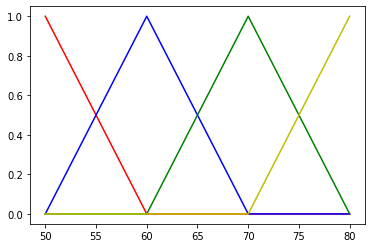

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full speed')


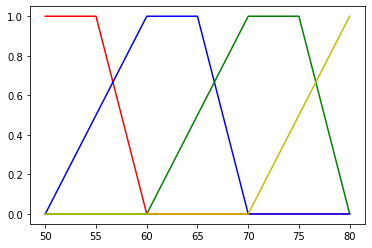

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)

slow = fuzz.trapmf(x,[50,50,55,60])
medium = fuzz.trapmf(x,[50,60,65,70])
medium_fast = fuzz.trapmf(x,[60,70,75,80])
full_speed = fuzz.trapmf(x,[70,80,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full speed')

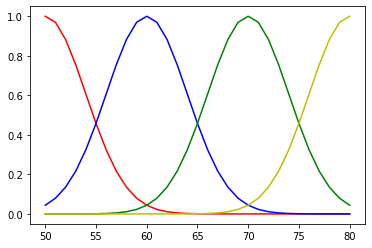

In [23]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)

slow = fuzz.gaussmf(x,50,4)
medium = fuzz.gaussmf(x,60,4)
medium_fast = fuzz.gaussmf(x,70,4)
full_speed = fuzz.gaussmf(x,80,4)

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full speed')

<Figure size 432x288 with 0 Axes>

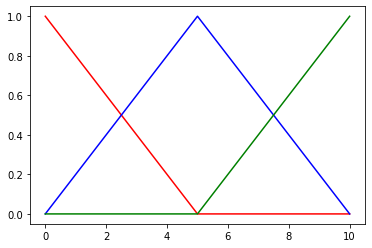

<Figure size 432x288 with 0 Axes>

In [31]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0,11,1)

poor = fuzz.trimf(x,[0,0,5])
average = fuzz.trimf(x,[0,5,10])
good = fuzz.trimf(x,[5,10,10])
#full_speed = fuzz.trapmf(x,[0,10,10,10])

plt.figure()
plt.plot(x,poor,'r',linewidth = 1.5, label = 'poor')
plt.plot(x,average,'b',linewidth = 1.5, label = 'average')
plt.plot(x,good,'g',linewidth = 1.5, label = 'good')
#plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full speed')

plt.figure()

26.28571428571428


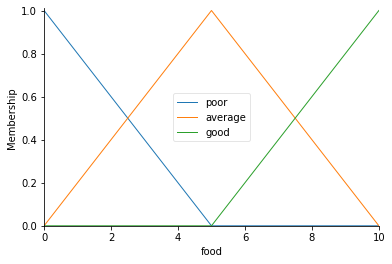

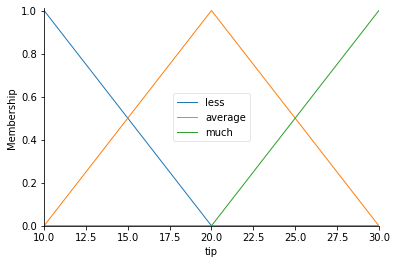

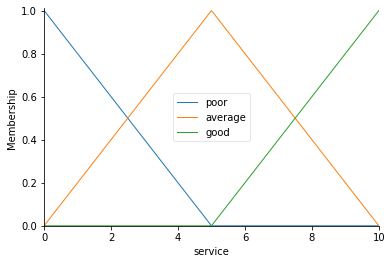

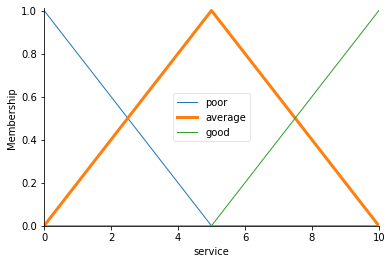

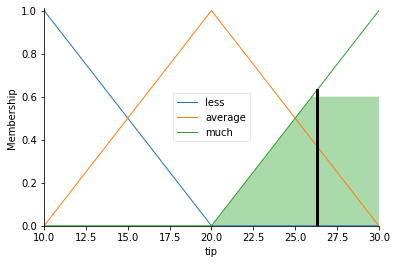

In [47]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
tip.view()
service.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule3 = ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule4 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['average'])
rule6 = ctrl.Rule(food['good'] & service['average'],tip['much'])
rule7 = ctrl.Rule(food['poor'] & service['good'],tip['less'])
rule8 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 10
tipping.input['service'] = 7
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

60.00000000000002


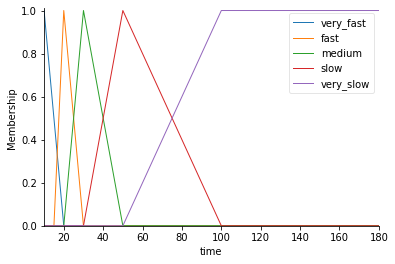

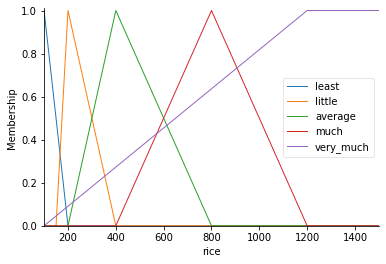

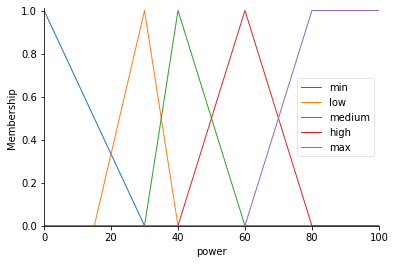

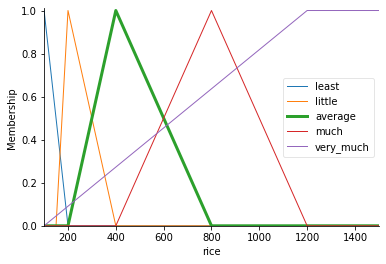

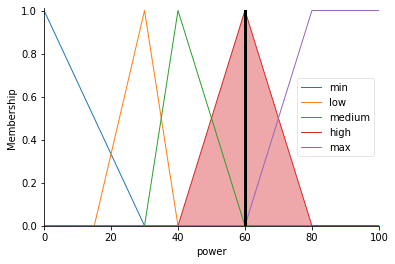

In [49]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very_fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[15,20,30])
time['medium'] = fuzz.trimf(time.universe,[20,30,50])
time['slow'] = fuzz.trimf(time.universe,[30,50,100])
time['very_slow'] = fuzz.trapmf(time.universe,[50,100,180,180])

rice['least'] = fuzz.trimf(rice.universe,[100,100,200])
rice['little'] = fuzz.trimf(rice.universe,[150,200,400])
rice['average'] = fuzz.trimf(rice.universe,[200,400,800])
rice['much'] = fuzz.trimf(rice.universe,[400,800,1200])
rice['very_much'] = fuzz.trapmf(rice.universe,[100,1200,1500,1500])

power['min'] = fuzz.trimf(power.universe,[0,0,30])
power['low'] = fuzz.trimf(power.universe,[15,30,40])
power['medium'] = fuzz.trimf(power.universe,[30,40,60])
power['high'] = fuzz.trimf(power.universe,[40,60,80])
power['max'] = fuzz.trapmf(power.universe,[60,80,100,100])
                          
time.view()
rice.view()
power.view()
rice['average'].view()

rule1 = ctrl.Rule(time['very_slow'] & rice['least'],power['min'])
rule2 = ctrl.Rule(time['slow'] & rice['least'],power['low'])
rule3 = ctrl.Rule(time['medium'] & rice['least'],power['low'])
rule4 = ctrl.Rule(time['fast'] & rice['least'],power['medium'])
rule5 = ctrl.Rule(time['very_fast'] & rice['least'],power['medium'])
rule6 = ctrl.Rule(time['very_slow'] & rice['little'],power['low'])
rule7 = ctrl.Rule(time['slow'] & rice['little'],power['low'])
rule8 = ctrl.Rule(time['medium'] & rice['little'],power['medium'])
rule9 = ctrl.Rule(time['fast'] & rice['little'],power['high'])
rule10 = ctrl.Rule(time['very_fast'] & rice['little'],power['high'])
rule11 = ctrl.Rule(time['very_slow'] & rice['average'],power['low'])
rule12 = ctrl.Rule(time['slow'] & rice['average'],power['medium'])
rule13 = ctrl.Rule(time['medium'] & rice['average'],power['medium'])
rule14 = ctrl.Rule(time['fast'] & rice['average'],power['high'])
rule15 = ctrl.Rule(time['very_fast'] & rice['average'],power['high'])
rule16 = ctrl.Rule(time['very_slow'] & rice['much'],power['medium'])
rule17 = ctrl.Rule(time['slow'] & rice['much'],power['high'])
rule18 = ctrl.Rule(time['medium'] & rice['much'],power['high'])
rule19 = ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule20 = ctrl.Rule(time['very_fast'] & rice['much'],power['max'])
rule21 = ctrl.Rule(time['very_slow'] & rice['very_much'],power['medium'])
rule22 = ctrl.Rule(time['slow'] & rice['very_much'],power['high'])
rule23 = ctrl.Rule(time['medium'] & rice['very_much'],power['high'])
rule24 = ctrl.Rule(time['fast'] & rice['very_much'],power['max'])
rule25 = ctrl.Rule(time['very_fast'] & rice['very_much'],power['max'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['time'] = 50
powering.input['rice'] = 800
powering.compute()
print(powering.output['power'])
power.view(sim=powering)
